## Reading and Exploring the dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
df = pd.read_csv("kc_house_data.csv")
df.head()


id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.000         3      1.000         1180   
1  6414100192  20141209T000000 538000.000         3      2.250         2570   
2  5631500400  20150225T000000 180000.000         2      1.000          770   
3  2487200875  20141209T000000 604000.000         4      3.000         1960   
4  1954400510  20150218T000000 510000.000         3      2.000         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650   1.000           0     0  ...      7        1180              0   
1      7242   2.000           0     0  ...      7        2170            400   
2     10000   1.000           0     0  ...      6         770              0   
3      5000   1.000           0     0  ...      7        1050            910   
4      8080   1.000           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.511 -122.257           1340        5650  
1      1951          1991    98125 47.721 -122.319           1690        7639  
2      1933             0    98028 47.738 -122.233           2720        8062  
3      1965             0    98136 47.521 -122.393           1360        5000  
4      1987             0    98074 47.617 -122.045           1800        7503  

[5 rows x 21 columns]

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

id       price  bedrooms  bathrooms  sqft_living  \
count      21613.000   21613.000 21613.000  21613.000    21613.000   
mean  4580301520.865  540088.142     3.371      2.115     2079.900   
std   2876565571.312  367127.196     0.930      0.770      918.441   
min      1000102.000   75000.000     0.000      0.000      290.000   
25%   2123049194.000  321950.000     3.000      1.750     1427.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900445.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21613.000 21613.000   21613.000 21613.000  21613.000 21613.000   
mean    15106.968     1.494       0.008     0.234      3.409     7.657   
std     41420.512     0.540       0.087     0.766      0.651     1.175   
min       520.000     1.000       0.000     0.000      1.000     1.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10688.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21613.000      21613.000 21613.000     21613.000 21613.000 21613.000   
mean     1788.391        291.509  1971.005        84.402 98077.940    47.560   
std       828.091        442.575    29.373       401.679    53.505     0.139   
min       290.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        560.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
std       0.141        685.391   27304.180  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000

In [10]:
df['bathrooms'].value_counts()

2.500    5380
1.000    3852
1.750    3048
2.250    2047
2.000    1930
1.500    1446
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      72
4.750      23
5.000      21
5.250      13
0.000      10
5.500      10
1.250       9
6.000       6
5.750       4
0.500       4
6.250       2
8.000       2
6.750       2
6.500       2
7.750       1
7.500       1
Name: bathrooms, dtype: int64

C:\Users\A7MED_SI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'The Skew is 4.024'}, xlabel='price', ylabel='Density'>

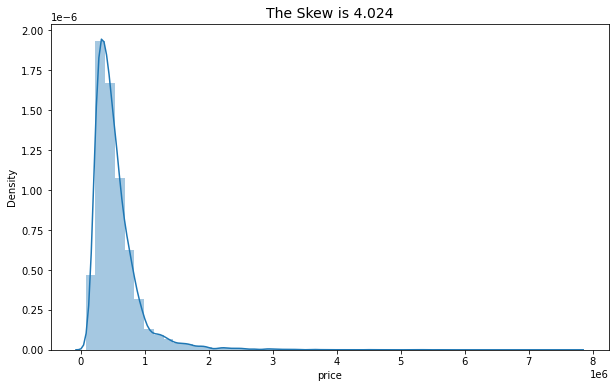

In [11]:
plt.figure(figsize=(10, 6))
plt.title(f'The Skew is {round(df["price"].skew(),3)}' , fontsize = 14)
sns.distplot(df['price'], bins=50, kde=True)

C:\Users\A7MED_SI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedrooms', ylabel='Density'>

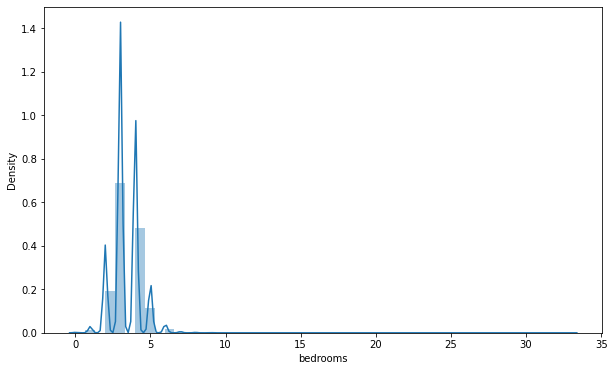

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(df['bedrooms'], bins=50)

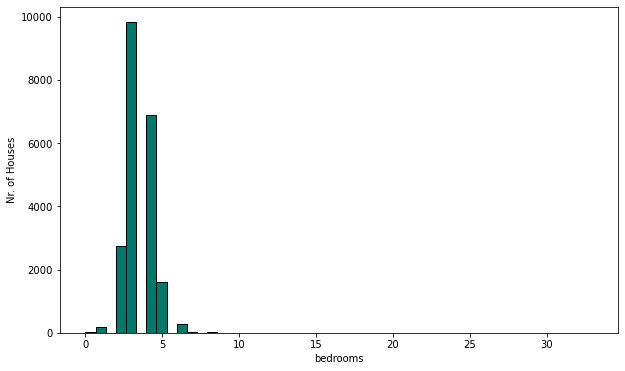

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['bedrooms'], ec='black',bins = 50 , color='#00796b')
plt.xlabel('bedrooms')
plt.ylabel('Nr. of Houses')
plt.show()

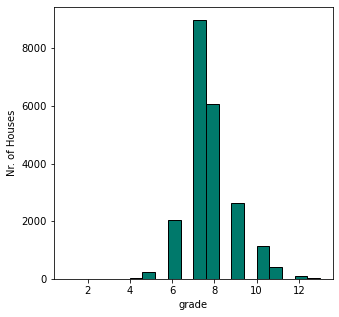

In [14]:
plt.figure(figsize=(5, 5))
plt.hist(df['grade'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('grade')
plt.ylabel('Nr. of Houses')
plt.show()

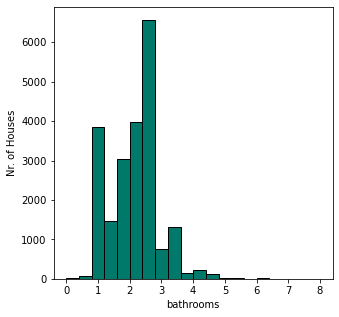

In [15]:
plt.figure(figsize=(5, 5))
plt.hist(df['bathrooms'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('bathrooms')
plt.ylabel('Nr. of Houses')
plt.show()

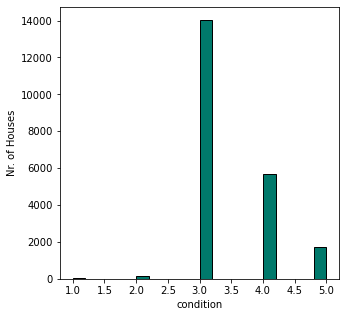

In [16]:
plt.figure(figsize=(5, 5))
plt.hist(df['condition'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('condition')
plt.ylabel('Nr. of Houses')
plt.show()

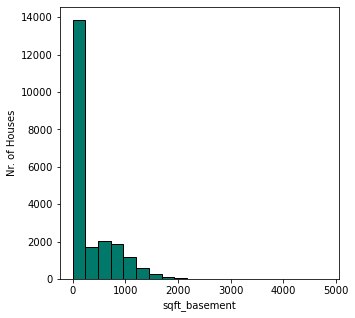

In [17]:
plt.figure(figsize=(5, 5))
plt.hist(df['sqft_basement'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('sqft_basement')
plt.ylabel('Nr. of Houses')
plt.show()

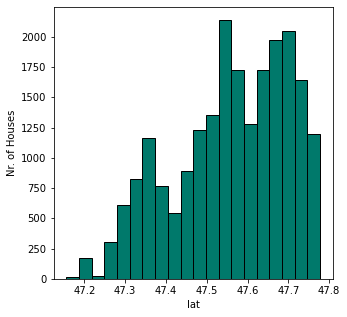

In [18]:
plt.figure(figsize=(5, 5))
plt.hist(df['lat'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('lat')
plt.ylabel('Nr. of Houses')
plt.show()

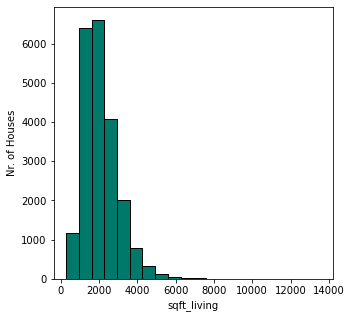

In [19]:
plt.figure(figsize=(5, 5))
plt.hist(df['sqft_living'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('sqft_living')
plt.ylabel('Nr. of Houses')
plt.show()

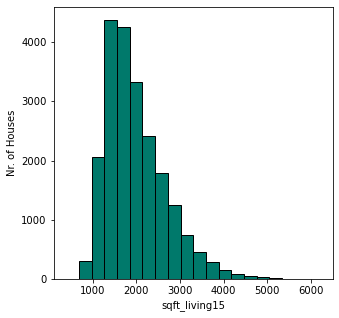

In [20]:
plt.figure(figsize=(5, 5))
plt.hist(df['sqft_living15'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('sqft_living15')
plt.ylabel('Nr. of Houses')
plt.show()

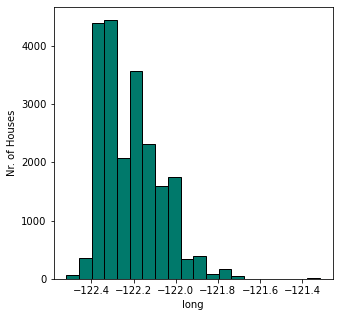

In [21]:
plt.figure(figsize=(5, 5))
plt.hist(df['long'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('long')
plt.ylabel('Nr. of Houses')
plt.show()

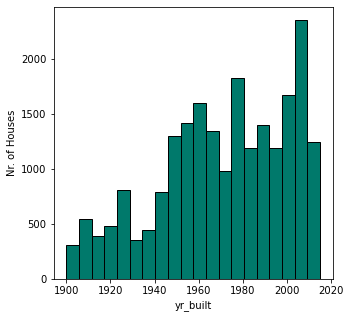

In [22]:
plt.figure(figsize=(5, 5))
plt.hist(df['yr_built'], ec='black',bins = 20 , color='#00796b')
plt.xlabel('yr_built')
plt.ylabel('Nr. of Houses')
plt.show()

<AxesSubplot:xlabel='grade', ylabel='price'>

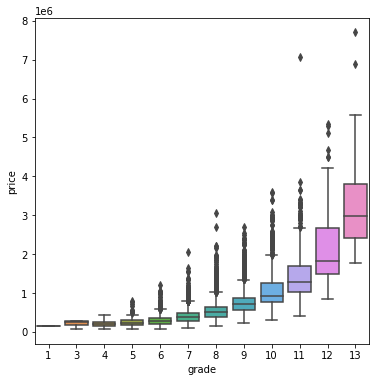

In [23]:
plt.figure(figsize = (6,6))
sns.boxplot(x='grade', y="price", data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

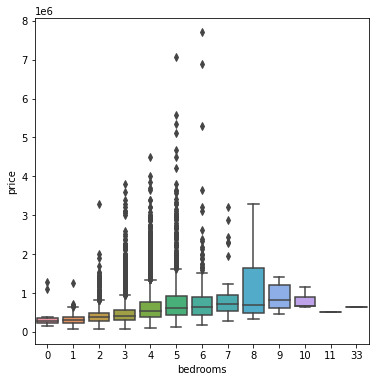

In [24]:
plt.figure(figsize = (6,6))
sns.boxplot(x='bedrooms', y="price", data=df)

<AxesSubplot:xlabel='floors', ylabel='price'>

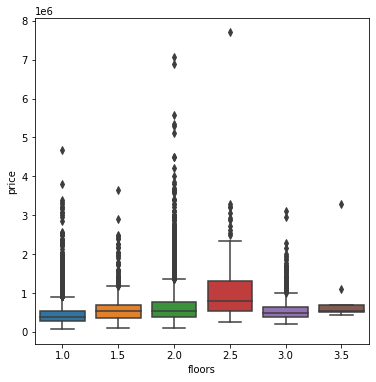

In [25]:
plt.figure(figsize = (6,6))
sns.boxplot(x='floors', y="price", data=df)

In [26]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

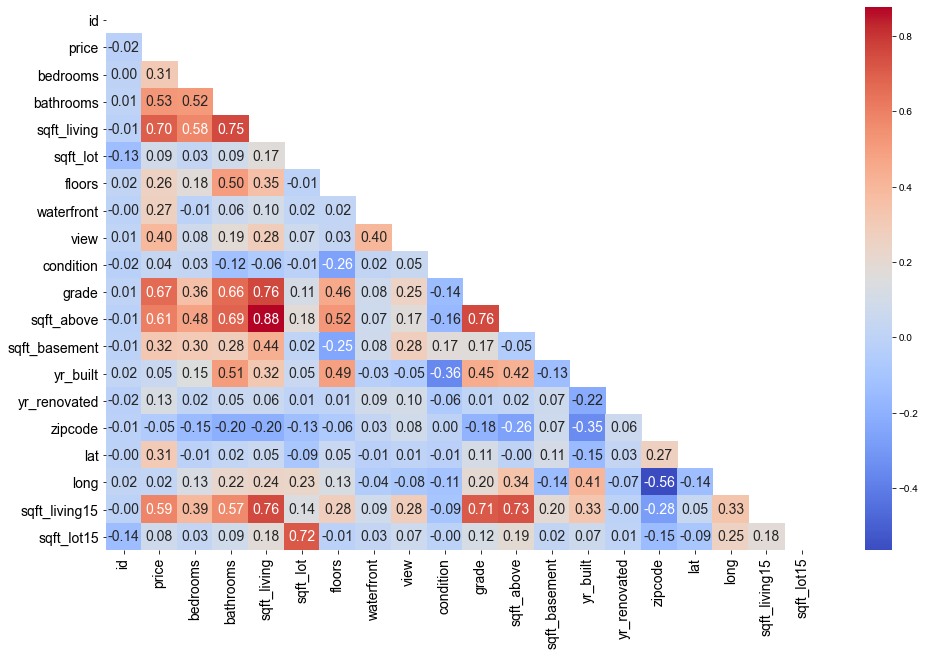

In [27]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f',cmap = 'coolwarm', annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [28]:
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)
reg = LinearRegression()
x_train = np.array(train_data['sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1, 1)
reg.fit(x_train, y_train)
#evaluate simple model
x_test = np.array(test_data['sqft_living']).reshape(-1, 1)
y_test = np.array(test_data['price']).reshape(-1, 1)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Root Mean Squared Error (RMSE)  254289.15
R-squared (training)  0.492
R-squared (testing)  0.496
Intercept:  [-47235.8113029]
Coefficient: [[282.2468152]]


<Figure size 648x648 with 0 Axes>

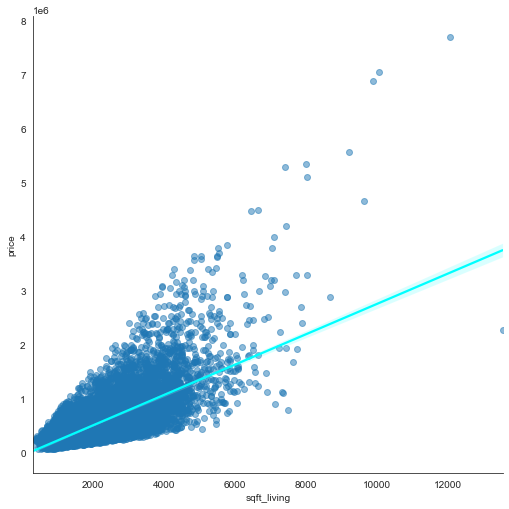

In [29]:
plt.figure(figsize=(9, 9))
sns.lmplot(x='sqft_living', y='price', data=df, height=7,scatter_kws = {'alpha' : 0.5},line_kws = {'color': 'cyan'} )
plt.show()

In [30]:
prices = df['price']
features = df.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=2)

regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('Mulitvariable Model with all the features')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(regr.score(X_train, y_train), 3))
print('R-squared (testing) ', round(regr.score(X_test, y_test), 3))
print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Mulitvariable Model with all the features
Root Mean Squared Error (RMSE)  199212.58
R-squared (training)  0.696
R-squared (testing)  0.716
Intercept:  7997556.183187202


coef
id                 -0.000
bedrooms       -35959.655
bathrooms       39844.759
sqft_living       113.290
sqft_lot            0.090
floors           9177.931
waterfront     572595.747
view            51692.583
condition       26827.595
grade           93995.937
sqft_above         70.086
sqft_basement      43.204
yr_built        -2600.807
yr_renovated       23.498
zipcode          -598.119
lat            608543.609
long          -214183.019
sqft_living15      21.172
sqft_lot15         -0.347

In [31]:
df['price'] = np.log(df['price'])


C:\Users\A7MED_SI\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'The Skew is 0.428'}, xlabel='price', ylabel='Density'>

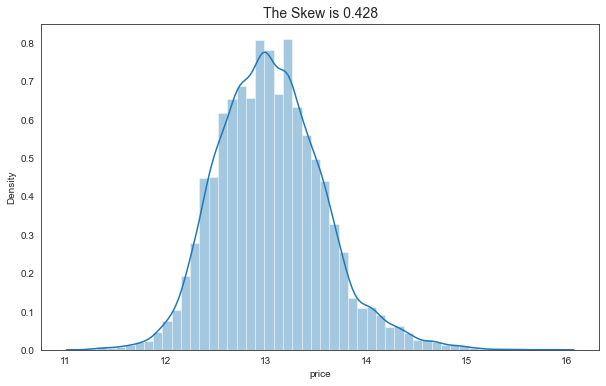

In [32]:
plt.figure(figsize=(10, 6))
plt.title(f'The Skew is {round(df["price"].skew(),3)}' , fontsize = 14)
sns.distplot(df['price'], bins=50, kde=True)

In [33]:
prices = df['price']
features = df.drop(['price','date'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=2)

regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)
print('Mulitvariable Model with all the features and with taking the log of the prices')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Root Mean Squared Error (RMSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(regr.score(X_train, y_train), 3))
print('R-squared (testing) ', round(regr.score(X_test, y_test), 3))
print('Intercept: ', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Mulitvariable Model with all the features and with taking the log of the prices
Root Mean Squared Error (RMSE)  0.25
R-squared (training)  0.769
R-squared (testing)  0.777
Intercept:  -7.689880517290499


coef
id             0.000
bedrooms      -0.012
bathrooms      0.071
sqft_living    0.000
sqft_lot       0.000
floors         0.073
waterfront     0.367
view           0.058
condition      0.063
grade          0.158
sqft_above     0.000
sqft_basement  0.000
yr_built      -0.003
yr_renovated   0.000
zipcode       -0.001
lat            1.406
long          -0.179
sqft_living15  0.000
sqft_lot15    -0.000

In [36]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value':results.pvalues})

coef  p-value
const         -7.690    0.062
id             0.000    0.132
bedrooms      -0.012    0.000
bathrooms      0.071    0.000
sqft_living    0.000    0.000
sqft_lot       0.000    0.000
floors         0.073    0.000
waterfront     0.367    0.000
view           0.058    0.000
condition      0.063    0.000
grade          0.158    0.000
sqft_above     0.000    0.000
sqft_basement  0.000    0.000
yr_built      -0.003    0.000
yr_renovated   0.000    0.000
zipcode       -0.001    0.000
lat            1.406    0.000
long          -0.179    0.000
sqft_living15  0.000    0.000
sqft_lot15    -0.000    0.057

In [35]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['id'],axis=1 )

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#results.params
#results.pvalues
print('evaluating model after dropping the id\n')
print('r-squard is ',round(results.rsquared,3))
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 5)})



evaluating model after dropping the id

r-squard is  0.769


coef  p-value
const         -7.466    0.070
bedrooms      -0.012    0.000
bathrooms      0.071    0.000
sqft_living    0.000    0.000
sqft_lot       0.000    0.000
floors         0.073    0.000
waterfront     0.367    0.000
view           0.058    0.000
condition      0.063    0.000
grade          0.158    0.000
sqft_above     0.000    0.000
sqft_basement  0.000    0.000
yr_built      -0.003    0.000
yr_renovated   0.000    0.000
zipcode       -0.001    0.000
lat            1.405    0.000
long          -0.178    0.000
sqft_living15  0.000    0.000
sqft_lot15    -0.000    0.045